<div>
<img src="content.jpg" width="500"/>
</div>

# CONTENT BASED FILTERING

Simply, it is the recommendation of a product with similar content according to the content of the product/service.

The Content-based approach requires a good amount of information about items’ features, rather than using the user’s interactions and feedback.

**Advantage:**

- The model doesn't need any data about other users, since the recommendations are specific to this user. This makes it easier to scale to a large number of users.


**Disadvantage:**
 
- The model can only make recommendations based on existing interests of the user. In other words, the model has limited ability to expand on the users' existing interests.



  *In this study, a recommendation system model will be built based on the content definitions of the recipes and the content of the recipe steps.

In [1]:
import pandas as pd

pd.set_option('display.max_columns',None)
pd.set_option('display.width', 500)
pd.set_option('display.expand_frame_repr', False)
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('RAW_recipes.csv')

In [3]:
df.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


In [4]:
print('Head of Description\n\n', df['description'].head(10))
print('=' *70)
print('Tail of Description\n\n', df['description'].tail(10))

Head of Description

 0    autumn is my favorite time of year to cook! th...
1    this recipe calls for the crust to be prebaked...
2    this modified version of 'mom's' chili was a h...
3    this is a super easy, great tasting, make ahea...
4    my dh's amish mother raised him on this recipe...
5                                                  NaN
6    my italian mil was thoroughly impressed by my ...
7    this recipe is posted by request and was origi...
8                                                  NaN
9                                  from ann hodgman's 
Name: description, dtype: object
Tail of Description

 231627                      a delicious bacon-studded tart.
231628    haricots verts are very slender french green b...
231629    recipe courtesy of b&c seafood, vacherie, la a...
231630    great sauce for cheeseburgers or dipping fries...
231631               a wrap inspired by great cajun flavors
231632    this is a delicious soup that i originally fou...
231633      t

In [5]:
print('Head of Steps\n\n', df['steps'].head(10))
print('=' *70)
print('Tail of Steps\n\n', df['steps'].tail(10))

Head of Steps

 0    ['make a choice and proceed with recipe', 'dep...
1    ['preheat oven to 425 degrees f', 'press dough...
2    ['brown ground beef in large pot', 'add choppe...
3    ['place potatoes in a large pot of lightly sal...
4    ['mix all ingredients& boil for 2 1 / 2 hours ...
5    ['combine ingredients in blender', 'cover and ...
6    ['toast the fennel seeds and lightly crush the...
7    ['in a medium saucepan combine all the ingredi...
8    ['crumble cookies into a 9-inch pie plate , or...
9    ['preheat oven to 350 degrees', 'butter two 9x...
Name: steps, dtype: object
Tail of Steps

 231627    ['crust:', 'pulse flour , baking powder , and ...
231628    ['into each of six sterile pint mason jars , p...
231629    ['place the lettuce on a platter or serving di...
231630    ['to make the sauce , combine the mayonnaise ,...
231631    ['bring 3 quarts salted to water to a boil', '...
231632    ['heat oil in a 4-quart dutch oven', 'add cele...
231633          ['mix all ingre

In [6]:
df.dropna(inplace=True)

In [7]:
random_foods = pd.Series(df['id']).sample(50000, random_state=17).values.tolist()
random_food_df = df[df['id'].isin(random_foods)].reset_index(drop=True)

**Note**  
In order to make the study more efficient, the entire data set will not be used. Because we have quite large dataset

In [8]:
random_food_df.shape

(50000, 12)

**TF is simply the frequency of a word in a document. IDF is the inverse of the document frequency among the whole corpus of documents.  
They are used to determine the relative importance of a document / article / news item / movie etc.**

In [9]:
tfidf = TfidfVectorizer(stop_words="english")

**TfidfVectorizer - Transforms text to feature vectors that can be used as input to estimator.**

In [10]:
tfidf_matrix = tfidf.fit_transform(random_food_df['description'])

In [11]:
tfidf_matrix.shape

(50000, 31413)

**There are 50000 recipes in our dataset. Columns consist of words in descriptions.**

In [12]:
random_food_df['description'].shape

(50000,)

In [13]:
tfidf.get_feature_names()[:20]

['00',
 '000',
 '000037moms_roast_turkey',
 '000ft',
 '001',
 '005178mexican_red_chili_sauce',
 '0060586141',
 '01',
 '02',
 '03',
 '038',
 '04',
 '045499',
 '05',
 '06',
 '062910',
 '07',
 '08',
 '082mg',
 '09']

In [14]:
tfidf_matrix.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [15]:
cosine_sim = cosine_similarity(tfidf_matrix,
                               tfidf_matrix)

In [16]:
cosine_sim.shape

(50000, 50000)

**Cosine similarity measures the similarity between two vectors of an inner product space.  
We can say that the purpose of use in this study is to measure the similarity of 50000 recipes with each other.**

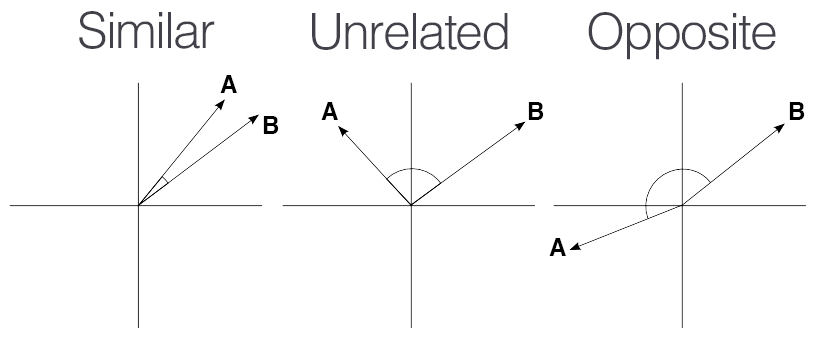

In [17]:
indices = pd.Series(random_food_df.index, index=random_food_df['name'])

In [18]:
indices

name
all in the kitchen  chili                           0
chicken lickin  good  pork chops                    1
chinese  chop suey                                  2
global gourmet  taco casserole                      3
grilled  venison burgers                            4
                                                ...  
zupse bread swiss bread                         49995
zurich diced veal zurcher geschnetzeltes        49996
zurie s holey rustic olive and cheddar bread    49997
zwetschgenkuchen   plum cake                    49998
zydeco shrimp wrap                              49999
Length: 50000, dtype: int64

In [19]:
indices.index.value_counts()

homemade pop tarts                      2
hot chicken dip                         2
old fashioned macaroni and cheese       2
cheddar bay biscuits  red lobster       2
russian style salad dressing            2
                                       ..
easy mediterranean pasta salad          1
easy melt in your mouth coconut cake    1
easy meringue topping                   1
easy mexican pozole soup  crock pot     1
zydeco shrimp wrap                      1
Name: name, Length: 49935, dtype: int64

In [20]:
indices = indices[~indices.index.duplicated(keep='last')]

## Recommendations Based on Similarities

In [21]:
def check_food(keyword):
    return [col for col in random_food_df.name if keyword in col]

**Determining the recipe to recommendation**

In [22]:
check_food('cookies')[:25]

['1 in canada chocolate chip cookies',
 'you can t eat just one  ice box cookies',
 'new  vanishing oatmeal raisin cookies',
 '101 super cookies',
 '3 ingredient peanut butter cookies',
 '5 chip cookies',
 '60 sec  chocolate oat peanut butter cookies',
 'absolutely the best chocolate chip cookies',
 'absolutely the best gluten free peanut butter cookies',
 'addictive white chocolate cookies',
 'agave oatmeal raisin flax cookies',
 'alaska molasses cookies',
 'all american chewy chocolate chip cookies',
 'almond bar cookies',
 'almond blueberry cookies',
 'almond butter cookies with frosting',
 'almond chocolate cookies',
 'almond cloud cookies',
 'almond crescent cookies',
 'almond joy cookies',
 'almond kiss cookies',
 'almond meringue cookies',
 'almond toffee cookies',
 'almond vanilla cookies',
 'almost flourless chocolate chocolate chip peanut butter cookies']

In [23]:
food_index = indices['almost flourless chocolate chocolate chip peanut butter cookies']

In [24]:
cosine_sim[food_index]

array([0.        , 0.        , 0.03095085, ..., 0.03743949, 0.00694732,
       0.        ])

**The similarity scores of the chosen recipe with other recipes are checked.**

In [25]:
similarity_scores = pd.DataFrame(cosine_sim[food_index],
                                 columns=["score"])

In [26]:
food_indices = similarity_scores.sort_values("score", ascending=False)[1:11].index

### 10 recipes most similar to the chosen recipe

In [27]:
random_food_df['name'].iloc[food_indices]

6934                  butterless peanut butter cookies
290                 3 ingredient peanut butter cookies
4993                   best peanut butter cookies ever
33522    peanut butter chip    chocolate chip pancakes
31078                   no flour peanut butter cookies
9038             chewy chocolate peanut butter cookies
1429                apple butter peanut butter cookies
11002                     chocolate peanut butter cake
24737                 jean pare s peanut butter treats
48557          weight watcher s general tsao s chicken
Name: name, dtype: object

### Recommendations appear to make sense

## Preparation of Working Script

In [28]:
def calculate_cosine_sim(dataframe, col):
    tfidf = TfidfVectorizer(stop_words='english')
    dataframe[col] = dataframe[col].fillna('')
    tfidf_matrix = tfidf.fit_transform(dataframe[col])
    cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
    return cosine_sim

def recommendation(recipe, cosine_sim, dataframe):
    indices = pd.Series(dataframe.index, index=dataframe['name'])
    indices = indices[~indices.index.duplicated(keep='last')]
    food_index = indices[recipe]
    similarity_scores = pd.DataFrame(cosine_sim[food_index],
                                 columns=["score"])
    food_indices = similarity_scores.sort_values("score", ascending=False)[1:11].index
    return dataframe['name'].iloc[food_indices]

**Note**   
The reason why I specified the col parameter is that there are other columns in the data set that I can make recommendations by using their content.

In [29]:
cosine_sim = calculate_cosine_sim(random_food_df, 'description')

In [30]:
check_food('vodka')[:20]

['absolut hunk vodka martini',
 'andreas viestad s vodka marinated sirloin',
 'blue cheese vodka balls  finger food',
 'cherry tomatoes marinated in vodka  in oversized martini glass',
 'connecticut pasta with vodka sauce',
 'cranberry and vodka sparkle',
 'cranberry vodka delight',
 'cranberry lime vodka punch',
 'cucumber  kumquat  and mint vodka cocktail',
 'delicious penne vodka with fresh mushrooms  mozzarella  olives',
 'dirty vodka martini w blue cheese olives',
 'easiest penne with vodka',
 'firebird s honey vodka',
 'foolproof pie dough  with vodka',
 'fresh pineapple infused vodka',
 'fruit vodka slush',
 'ginger vodka',
 'grandma bea s vodka slush',
 'linda s lemon shrimp a la vodka pasta',
 'lobster ravioli with a light tomato vodka sauce']

In [31]:
recommendation('dirty vodka martini w blue cheese olives', cosine_sim, random_food_df)

18149                 filthy martini
1599               apple pie martini
33375                  peach martini
29195    mike s butterscotch martini
28741             melon ball martini
46715            traditional martini
20866                     greek mama
26426     lemon vanilla mint martini
79                      007  martini
27047             london sun martini
Name: name, dtype: object

In [32]:
recs = recommendation('dirty vodka martini w blue cheese olives', cosine_sim, random_food_df).values.tolist()

In [33]:
print(f"Ingredients: {random_food_df.loc[random_food_df['name'] == 'dirty vodka martini w blue cheese olives', 'ingredients'].values}")

Ingredients: ["['blue cheese', 'dry vermouth', 'vodka', 'spanish olives', 'ice']"]


In [34]:
for rec in recs:
    print(f"Recipe {rec}  :\n  Ingredients: {random_food_df.loc[random_food_df['name'] == rec, 'ingredients'].values} \n {'='*80}")

Recipe filthy martini  :
  Ingredients: ["['vodka', 'brine', 'dry vermouth', 'capers']"] 
Recipe apple pie martini  :
  Ingredients: ["['vodka', 'goldschlager', 'apple juice', 'cranberry juice', 'apple']"] 
Recipe peach martini  :
  Ingredients: ["['peach juice', 'ice cubes', 'vodka', 'disaronno liquor']"] 
Recipe mike s butterscotch martini  :
  Ingredients: ["['vanilla vodka', 'butterscotch schnapps', 'ice cubes']"] 
Recipe melon ball martini  :
  Ingredients: ["['citrus-infused vodka', 'midori melon liqueur', 'orange juice']"] 
Recipe traditional martini  :
  Ingredients: ["['vodka', 'dry vermouth', 'olive']"] 
Recipe greek mama  :
  Ingredients: ["['frangelico', 'ouzo', 'dark rum']"] 
Recipe lemon vanilla mint martini  :
  Ingredients: ["['lemon', 'sugar', 'ice', 'vanilla vodka', 'mint leaf']"] 
Recipe 007  martini  :
  Ingredients: ["['dry vermouth', 'vodka', 'gin', 'lillet blanc']"] 
Recipe london sun martini  :
  Ingredients: ["['dry gin', 'dry sherry', 'orange bitters', 'lemon 

**The contents appear to be quite close to each other.**

## Recommendations Based on Recipe Steps

In [35]:
cosine_sim = calculate_cosine_sim(random_food_df, 'steps')

In [39]:
check_food('chicken breasts')[:20]

['apple bacon stuffed chicken breasts',
 'artichoke stuffed chicken breasts',
 'asian grilled chicken breasts',
 'asian style chicken breasts and bacon',
 'bacon and cheese stuffed chicken breasts',
 'bacon wrapped chicken breasts',
 'bacon wrapped smoked gouda stuffed chicken breasts',
 'baked buffalo chicken breasts',
 'baked chicken breasts and rice',
 'baked chicken breasts in red wine  easy',
 'baked chicken breasts with almond sauce',
 'baked chicken breasts with cornbread stuffing',
 'baked chicken breasts with garlic and oregano',
 'baked chicken breasts with gravy',
 'baked chicken breasts with horseradish cream sauce',
 'baked chicken breasts with parmesan garlic crust',
 'baked chicken breasts with parmesan garlic crust',
 'baked herb crusted chicken breasts',
 'baked stuffed boneless chicken breasts',
 'baked tarragon chicken breasts']

In [40]:
recommendation('bacon wrapped chicken breasts', cosine_sim, random_food_df)

13423                         creamy bacon wrapped chicken
10073                                        chicken yeffa
10015                    chicken with homemade herb cheese
9366     chicken breast wrapped in bacon with mushroom ...
12826                         cousin cosmo s greek chicken
49717                         zesty cheesy crumbed chicken
48580                  weight watchers chicken cordon bleu
9752                             chicken pepperoni delight
14438                        crocked bacon wrapped chicken
40264                           simple chicken cordon bleu
Name: name, dtype: object

In [43]:
check_food('avocado salad')[:20]

['almond crumbed chicken schnitzel with avocado salad',
 'asparagus  artichoke  and avocado salad',
 'asparagus  snap pea and avocado salad',
 'avocado salad with tomato relish',
 'avocado salad with warm tomato basil vinaigrette',
 'bacon tomato and avocado salad',
 'celery and avocado salad',
 'cherry tomato avocado salad',
 'chicken  bacon and avocado salad',
 'corn  tomato and avocado salad',
 'corn  tomato  and avocado salad',
 'curried potato  chicken and avocado salad',
 'dandelion greens  or arugula  and avocado salad',
 'eggplant  aubergine    avocado salad',
 'orange avocado salad with poppy seed dressing',
 'papaya avocado salad',
 'pineapple chicken w  black bean avocado salad',
 'potato avocado salad',
 'roasted carrot and avocado salad',
 'simple papaya avocado salad']

In [44]:
recommendation('asparagus  artichoke  and avocado salad', cosine_sim, random_food_df)

16124                            east west asparagus salad
18739                       fresh balsamic asparagus salad
16684                             easy marinated asparagus
694                                           al khurshoof
10332                        chilled asparagus with pecans
28173    marinated artichoke hearts  shrimp  and mushrooms
2191                                asparagus walnut salad
2139                              asparagus   tomato salad
39139                           sauteed confetti asparagus
47816                             vegetable and pasta toss
Name: name, dtype: object

In [45]:
check_food('eggplant')[:20]

['acadia s eggplant parmesan',
 'acadia s stuffed eggplant',
 'ajvar  eggplant  aubergine    peppers',
 'antipasto di melanzane  eggplant appetizer',
 'asian stuffed eggplant with hawaiian style pork  or turkey  hash',
 'aubergine  eggplant  and broccoli laksa',
 'aubergine  eggplant  assanta',
 'aubergine  eggplant  balls',
 'aubergine  eggplant  curry with lemongrass   coconut milk',
 'baba ganous  turkish eggplant salad',
 'baguette sandwich with roasted eggplant  tomatoes and pesto',
 'baingan bharta  curried eggplant  aubergine',
 'baked breaded eggplant  aubergine',
 'baked eggplant and ricotta rolls',
 'baked eggplant casserole',
 'baked eggplant with mushroom tomato sauce',
 'baked eggplant ww',
 'baked stuffed baby eggplant  aubergine',
 'baked ziti with eggplant and ricotta cheese',
 'baklazhanovaya ikra   eggplant  aubergine   caviar']

In [46]:
recommendation('baked eggplant and ricotta rolls', cosine_sim, random_food_df)

8743                     cheesy low carb eggplant parmesan
3113             baked eggplant with mushroom tomato sauce
15337                          delicious eggplant parmesan
17178    eggplant  aubergine   rollatini with three che...
28903               mexican eggplant  aubergine  casserole
46804        triple cheese eggplant  aubergine  parmigiana
17555                 ev s eggplant  aubergine  parmigiana
17199                        eggplant  aubergine  rolatini
17213                                  eggplant parmigiano
17212                eggplant parmigiana   weight watchers
Name: name, dtype: object

### As a result, we can see that both models got successful results, but the recipe steps are more useful because they contain more information.